# Homework 02

## Linear Regression  by 20175437 신준섭 

In [15]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

# make figures to plot or scatter somethings
def make_fig():
    fig, ax = plt.subplots(1, figsize=(3, 5))   # make the figure
    ax.set_xlim([-0.5, 2.5])                    # x-axis limits
    ax.set_ylim([-0.5, 4.5])                    # y-axis limites

    plt.axhline(0, color='gray')                # axis colors
    plt.axvline(0, color='gray')                # axis colors

    return fig, ax

## Defining the linear model
The linear model that we want to test the regresion
$$\hat{y}(x) = ax+b$$


Defining $a = 2, b = 1$ for true value
$$\hat{y}(x) = 2x+1$$


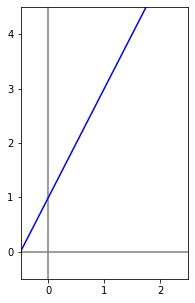

In [21]:
a, b= 2, 1

x = np.arange(-1, 3, 0.1)                   # x values
y = a * x + b                               # coressponding y in linear model

fig, ax = make_fig()                        # make figure

ax.plot(x, y, color='blue')                 # plot the linear model

fig.show()

## Generating datas with noises

gaussian noise $n \sim \mathcal{N}(0, {\sigma}^2)$ applied $y=\hat{y}+n$
    where $\sigma = 1.5$

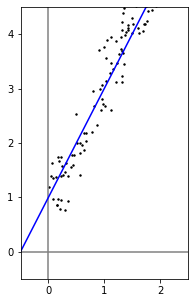

In [22]:
m = 100                     # number of noised datas
mu, sigma = 0, 0.4          # gaussian noise parameters

# making the moise
noise_x = 2.0 * np.random.sample((m,))
noise_y = a * noise_x + b + np.random.normal(mu, sigma, m)

fig, ax = make_fig()        # make figure

ax.plot(x, y, color='blue')                     # plot the true line
ax.scatter(noise_x, noise_y, c='black', s=2)    # plot the noised data

fig.show()
